# Tentang DATA

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
file = "/content/drive/MyDrive/TA/EDF/chb01_18.edf"
data = mne.io.read_raw_edf(file) # membaca file edf dan menyimpannya di data
data

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-4-44666732c959>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(file) # membaca file edf dan menyimpannya di data


<RawEDF | chb01_18.edf, 23 x 921600 (3600.0 s), ~27 kB, data not loaded>

In [ ]:
info = data.info #menyimpan informasi metadata terkait dataset EEG yang dimuat, seperti frekuensi sampling, jenis kanal, dan informasi lainnya.
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-07 04:45:06 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


In [ ]:
channels = data.ch_names #mengembalikan daftar nama-nama kanal (channel) yang ada dalam dataset EEG.
channels

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

Bipolar montage mengukur perbedaan tegangan antara dua titik elektroda yang berdekatan di kulit kepala. Nama-nama kanal seperti 'FP1-F7' menunjukkan bahwa tegangan yang diukur adalah perbedaan antara elektroda di posisi FP1 (Frontal Pole 1) dan F7 (Frontal 7).
Bipolar montage digunakan untuk meningkatkan resolusi spasial dari data EEG. Dengan mengukur perbedaan tegangan antara dua elektroda yang berdekatan, aktivitas listrik otak lokal bisa lebih jelas terlihat, karena setiap pengukuran lebih berfokus pada area kecil dari otak.

pelajari bipolar montage!!

In [ ]:
raw_data = data.get_data() # Setiap baris dari array ini mewakili sinyal dari satu kanal (channel) EEG, dan setiap kolom mewakili sampel dalam waktu tertentu.
print(raw_data)

[[ 3.53601954e-05  1.95360195e-07  1.95360195e-07 ... -1.26984127e-05
  -4.10256410e-06  3.32112332e-06]
 [ 6.34920635e-05  1.95360195e-07  1.95360195e-07 ...  1.66056166e-05
   1.73870574e-05  1.66056166e-05]
 [-6.83760684e-06  1.95360195e-07  1.95360195e-07 ...  9.18192918e-06
   6.44688645e-06  3.71184371e-06]
 ...
 [ 1.34798535e-05  1.95360195e-07  1.95360195e-07 ...  3.84859585e-05
   2.87179487e-05  2.05128205e-05]
 [ 1.02564103e-04  1.95360195e-07  1.95360195e-07 ...  6.85714286e-05
   6.27106227e-05  5.52869353e-05]
 [ 9.76800977e-07  1.95360195e-07  1.95360195e-07 ... -3.65323565e-05
  -3.26251526e-05 -2.94993895e-05]]


In [ ]:
df=pd.DataFrame(raw_data) #mengonversi data EEG mentah (raw_data) yang berbentuk array NumPy ke dalam bentuk DataFrame pandas
#raw_data adalah array dua dimensi di mana setiap baris mewakili sinyal dari satu kanal EEG, dan setiap kolom mewakili titik waktu tertentu.
print(df)

          0             1             2             3             4       \
0   3.536020e-05  1.953602e-07  1.953602e-07 -1.953602e-07  1.953602e-07   
1   6.349206e-05  1.953602e-07  1.953602e-07  5.860806e-07  1.953602e-07   
2  -6.837607e-06  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
3   1.621490e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
4   5.177045e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
5   1.191697e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
6   8.791209e-06  1.953602e-07  1.953602e-07 -1.953602e-07  1.953602e-07   
7   3.575092e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
8   5.059829e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
9   2.598291e-05  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
10 -1.166300e-04  1.953602e-07 -1.953602e-07 -3.711844e-06  1.367521e-06   
11 -7.521368e-05  1.953602e-07  1.953602e-07 -2.930403e-06 -1.758242e-06   
12 -2.871795

In [ ]:
print(df.shape) #23 baris dan 921600 kolom

(23, 921600)


In [ ]:
sinyal = df.T  # Transpose DataFrame untuk menukar baris dan kolom
sinyal


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,3.536020e-05,6.349206e-05,-6.837607e-06,1.621490e-05,5.177045e-05,1.191697e-05,8.791209e-06,3.575092e-05,5.059829e-05,2.598291e-05,...,1.049084e-04,9.768010e-07,-1.924298e-04,-4.434676e-05,1.894994e-05,7.228327e-06,-1.619536e-04,1.347985e-05,1.025641e-04,9.768010e-07
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,-5.860806e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
3,-1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,2.148962e-06,-1.953602e-07,-6.837607e-06,-5.860806e-07,-1.758242e-06,1.953602e-07,-1.758242e-06,9.768010e-07,2.148962e-06,-1.953602e-07
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,-1.953602e-07,5.860806e-07,1.758242e-06,1.953602e-07,5.860806e-07,-1.953602e-07,-1.953602e-07,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,-2.559219e-05,5.274725e-06,1.543346e-05,-1.934066e-05,-5.665446e-06,8.009768e-06,-1.113553e-05,-1.465201e-05,-3.184371e-05,5.724054e-05,...,7.169719e-05,-4.434676e-05,-8.791209e-06,4.434676e-05,-2.246642e-05,-1.504274e-05,-3.692308e-05,4.669109e-05,6.583639e-05,-4.434676e-05
921596,-1.934066e-05,1.113553e-05,1.543346e-05,-2.481074e-05,5.860806e-07,1.621490e-05,-1.113553e-05,-2.246642e-05,-2.754579e-05,6.739927e-05,...,7.716728e-05,-3.965812e-05,-5.645910e-05,5.098901e-05,-2.051282e-05,-1.504274e-05,-3.575092e-05,4.512821e-05,6.622711e-05,-3.965812e-05
921597,-1.269841e-05,1.660562e-05,9.181929e-06,-2.363858e-05,6.056166e-06,2.285714e-05,-1.621490e-05,-2.285714e-05,-2.442002e-05,7.365079e-05,...,7.912088e-05,-3.653236e-05,-8.732601e-05,5.567766e-05,-1.894994e-05,-8.791209e-06,-3.536020e-05,3.848596e-05,6.857143e-05,-3.653236e-05
921598,-4.102564e-06,1.738706e-05,6.446886e-06,-2.285714e-05,1.035409e-05,2.793651e-05,-1.934066e-05,-2.246642e-05,-2.363858e-05,8.107448e-05,...,6.778999e-05,-3.262515e-05,-3.301587e-05,6.818071e-05,-1.269841e-05,-6.056166e-06,-2.402930e-05,2.871795e-05,6.271062e-05,-3.262515e-05


In [ ]:
print(sinyal.shape) #921600 baris 23 kolom

(921600, 23)


# Domain

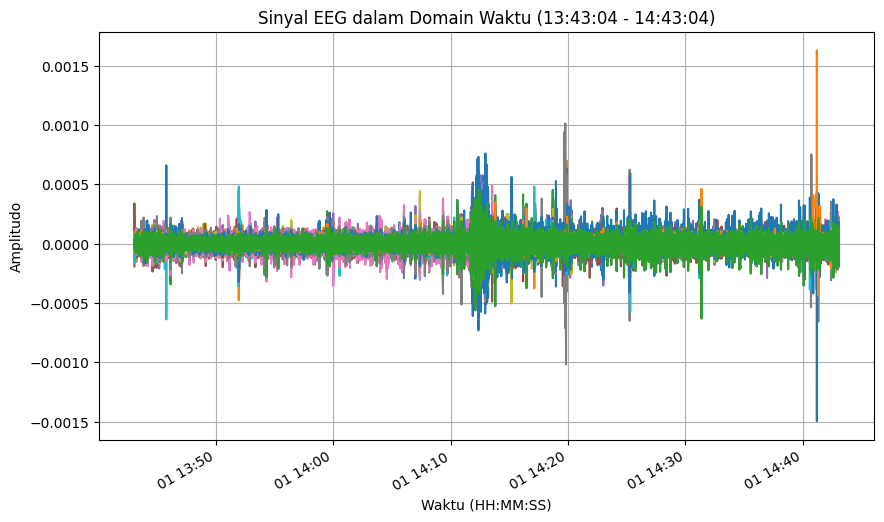

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Frekuensi sampling
fs = 256  # Hz

# Durasi rekaman (1 jam = 3600 detik)
durasi_total = 3600  # detik

# Membuat array waktu dalam detik
waktu_detik = np.arange(0, durasi_total, 1/fs)

# Waktu mulai rekaman
start_time = datetime.datetime.strptime("13:43:04", "%H:%M:%S")

# Mengonversi array waktu menjadi format jam:menit:detik
waktu_rekaman = [start_time + datetime.timedelta(seconds=t) for t in waktu_detik]

# Membaca data EEG (contoh, ganti dengan data yang sesuai)
# Misalkan kita memiliki data sinyal dengan panjang yang sesuai dengan waktu_detik
# data = pd.read_csv('chb01_03.csv')  # Ganti ini dengan data EEG yang sesuai
# sinyal = data.iloc[:, 1]  # Mengambil kolom sinyal pertama


# Plot domain waktu dengan waktu spesifik
plt.figure(figsize=(10, 6))
plt.plot(waktu_rekaman, sinyal)
plt.title("Sinyal EEG dalam Domain Waktu (13:43:04 - 14:43:04)")
plt.xlabel("Waktu (HH:MM:SS)")
plt.ylabel("Amplitudo")
plt.grid()
plt.gcf().autofmt_xdate()  # Memutar label waktu pada sumbu x agar lebih rapi
plt.show()


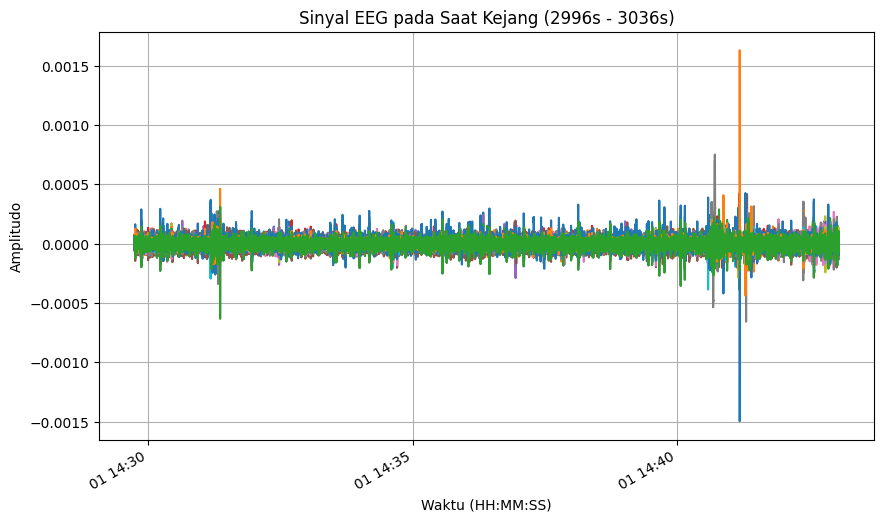

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Frekuensi sampling
fs = 256  # Hz

# Seizure start and end time in seconds
seizure_start = 2800  # detik
seizure_end = 3600    # detik

# Waktu mulai rekaman
start_time = datetime.datetime.strptime("13:43:04", "%H:%M:%S")

# Membuat array waktu untuk seluruh rekaman dalam detik
waktu_detik = np.arange(0, 3600, 1/fs)

# Subset array waktu untuk periode kejang saja
waktu_kejang_detik = np.arange(seizure_start, seizure_end, 1/fs)

# Konversi waktu dalam detik menjadi format waktu (HH:MM:SS)
waktu_kejang = [start_time + datetime.timedelta(seconds=t) for t in waktu_kejang_detik]

# Membaca data EEG (contoh, ganti dengan data yang sesuai)
# Misalkan kita memiliki data sinyal dengan panjang yang sesuai dengan waktu_detik
# data = pd.read_csv('chb01_03.csv')  # Ganti ini dengan data EEG yang sesuai
# sinyal = data.iloc[:, 1]  # Mengambil kolom sinyal pertama

# Subset sinyal untuk periode kejang saja
sinyal_kejang = sinyal[int(seizure_start*fs):int(seizure_end*fs)]

# Plot domain waktu pada saat kejang
plt.figure(figsize=(10, 6))
plt.plot(waktu_kejang, sinyal_kejang)
plt.title("Sinyal EEG pada Saat Kejang (2996s - 3036s)")
plt.xlabel("Waktu (HH:MM:SS)")
plt.ylabel("Amplitudo")
plt.grid()
plt.gcf().autofmt_xdate()  # Memutar label waktu pada sumbu x agar lebih rapi
plt.show()


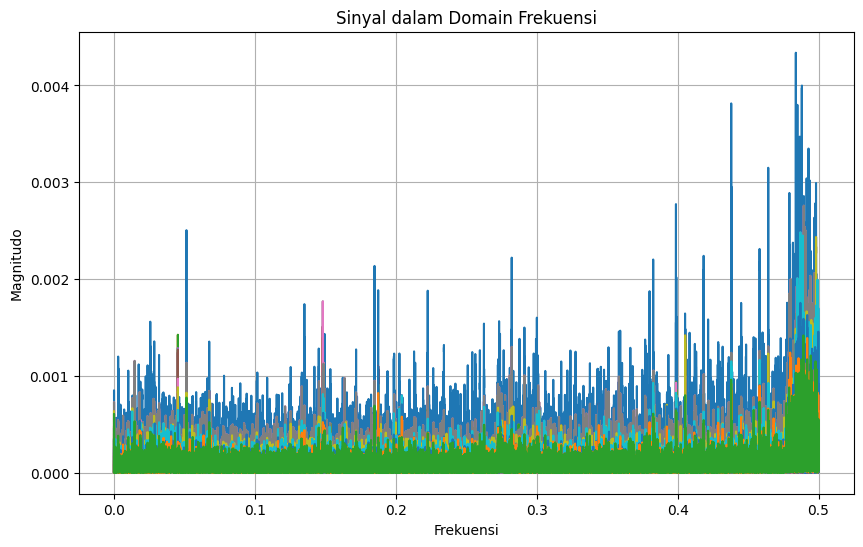

In [ ]:
# FFT untuk domain frekuensi
n = len(sinyal)  # Panjang sinyal
frekuensi = np.fft.fftfreq(n)  # Menghasilkan frekuensi
sinyal_frek = np.fft.fft(sinyal)  # FFT dari sinyal

# Plot domain frekuensi
plt.figure(figsize=(10, 6))
plt.plot(frekuensi[:n // 2], np.abs(sinyal_frek)[:n // 2])  # Hanya mengambil setengah bagian frekuensi
plt.title("Sinyal dalam Domain Frekuensi")
plt.xlabel("Frekuensi")
plt.ylabel("Magnitudo")
plt.grid()
plt.show()

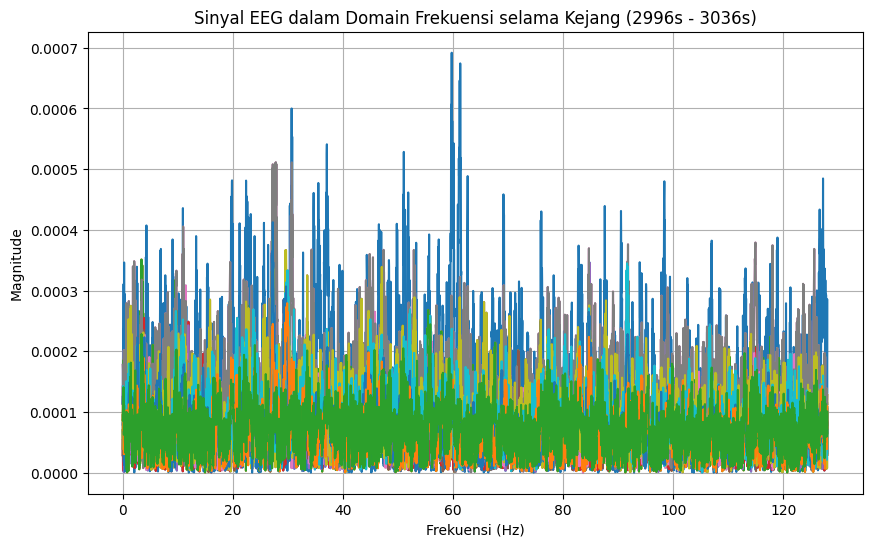

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Frekuensi sampling
fs = 256  # Hz

# Seizure start and end time in seconds
seizure_start = 2996  # detik
seizure_end = 3036    # detik

# Membuat array waktu untuk seluruh rekaman dalam detik
waktu_detik = np.arange(0, 3600, 1/fs)

# Subset array waktu untuk periode kejang saja
waktu_kejang_detik = np.arange(seizure_start, seizure_end, 1/fs)

# Membaca data EEG (contoh, ganti dengan data yang sesuai)
# Misalkan kita memiliki data sinyal dengan panjang yang sesuai dengan waktu_detik
# data = pd.read_csv('chb01_03.csv')  # Ganti ini dengan data EEG yang sesuai
# sinyal = data.iloc[:, 1]  # Mengambil kolom sinyal pertama

# Subset sinyal untuk periode kejang saja
sinyal_kejang = sinyal[int(seizure_start*fs):int(seizure_end*fs)]

# Hitung FFT (Fast Fourier Transform) untuk domain frekuensi
n = len(sinyal_kejang)  # Panjang sinyal
frekuensi = np.fft.fftfreq(n, d=1/fs)  # Array frekuensi
sinyal_fft = np.fft.fft(sinyal_kejang)  # FFT dari sinyal

# Hanya gunakan frekuensi positif (setengah spektrum)
frekuensi_positif = frekuensi[:n//2]
sinyal_fft_magnitude = np.abs(sinyal_fft[:n//2])

# Plot domain frekuensi
plt.figure(figsize=(10, 6))
plt.plot(frekuensi_positif, sinyal_fft_magnitude)
plt.title("Sinyal EEG dalam Domain Frekuensi selama Kejang (2996s - 3036s)")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


In [ ]:
# Hitung jumlah sampel
jumlah_sampel = len(sinyal)

# Frekuensi sampling (misal, 256 Hz)
fs = 256  # Sesuaikan dengan frekuensi sampling EEG Anda

# Menghitung durasi waktu total
durasi_total = jumlah_sampel / fs
print(f"Durasi total rekaman EEG: {durasi_total} detik")

Durasi total rekaman EEG: 3600.0 detik


# gpt klasifikasi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Misalkan data_sinyal dan label_sinyal adalah data yang sudah Anda miliki
# data_sinyal adalah DataFrame yang berisi sinyal EEG, dan label_sinyal adalah array dengan label (0 = tidak kejang, 1 = kejang)

# Contoh data dummy
data_sinyal = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'feature3': np.random.randn(1000)
})
label_sinyal = np.random.randint(0, 2, size=1000)  # Label dummy (0 = tidak kejang, 1 = kejang)


In [ ]:
def extract_features(sinyal):
    n = len(sinyal)
    frekuensi = np.fft.fftfreq(n, d=1/fs)
    sinyal_fft = np.fft.fft(sinyal)

    # Menghitung magnitudo
    sinyal_fft_magnitude = np.abs(sinyal_fft)

    # Mengambil setengah spektrum frekuensi (positif)
    return sinyal_fft_magnitude[:n//2]

# Ekstraksi fitur untuk data sinyal
fitur = np.array([extract_features(row) for row in data_sinyal.values])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fitur, label_sinyal, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[62 77]
 [95 66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.45      0.42       139
           1       0.46      0.41      0.43       161

    accuracy                           0.43       300
   macro avg       0.43      0.43      0.43       300
weighted avg       0.43      0.43      0.43       300



# Filter

In [ ]:

from scipy.signal import butter, filtfilt

# Frekuensi sampling
fs = 256  # Hz

# Fungsi untuk menerapkan filter bandpass
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, df)
    return y

# Rentang frekuensi untuk EEG
lowcut = 1.0  # Hz
highcut = 50.0  # Hz

# Contoh sinyal EEG
# Misalkan sinyal adalah array numpy dari sinyal EEG
# data = pd.read_csv('chb01_03.csv')  # Ganti ini dengan data EEG yang sesuai
# sinyal = data.iloc[:, 1]  # Mengambil kolom sinyal pertama






In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frekuensi Nyquist
    low = lowcut / nyq  # Frekuensi batas bawah dalam domain normalisasi
    high = highcut / nyq  # Frekuensi batas atas dalam domain normalisasi
    b, a = butter(order, [low, high], btype='band')  # Desain filter bandpass
    y = filtfilt(b, a, df)  # Terapkan filter ke data
    return y

# Parameter filter
lowcut = 1.0  # Batas bawah frekuensi
highcut = 50.0  # Batas atas frekuensi
fs = 256  # Frekuensi sampling

 # Sinyal dengan frekuensi 10 Hz

# Terapkan filter bandpass
sinyal_filtered = bandpass_filter(sinyal, lowcut, highcut, fs)


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, df)

# Terapkan filter bandpass
sinyal_filtered = bandpass_filter(sinyal, lowcut, highcut, fs)


In [ ]:
from sklearn.decomposition import FastICA
import numpy as np

def remove_artefacts(sinyal):
    # Terapkan ICA untuk memisahkan komponen sinyal
    ica = FastICA(n_components=5)
    S_ = ica.fit_transform(sinyal.reshape(-1, 1))  # Fit ICA
    A_ = ica.mixing_  # Ambil komponen
    # Untuk keperluan contoh, kita hanya mengembalikan sinyal tanpa artefak
    return ica.inverse_transform(S_)

sinyal_cleaned = remove_artefacts(sinyal_filtered)


In [ ]:
# Seizure start and end time in seconds
seizure_start = 2800  # detik
seizure_end = 3600    # detik

# Indeks periode kejang
start_idx = int(seizure_start * fs)
end_idx = int(seizure_end * fs)
sinyal_segment = sinyal_cleaned[start_idx:end_idx]


In [ ]:
segment_duration = 10  # detik
segment_size = int(segment_duration * fs)
segments = [sinyal_cleaned[i:i + segment_size] for i in range(0, len(sinyal_cleaned), segment_size)]


In [ ]:
import h5py

# Simpan data ke HDF5
with h5py.File('eeg_data.h5', 'w') as f:
    f.create_dataset('sinyal', data=sinyal_cleaned)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Misalkan sinyal_cleaned adalah sinyal yang telah dibersihkan

# Definisikan waktu dalam detik
time = np.arange(len(sinyal_cleaned)) / fs

# Plot sinyal yang telah dibersihkan
plt.figure(figsize=(12, 6))
plt.plot(time, sinyal_cleaned)
plt.title("Sinyal EEG yang Telah Dibersihkan")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid()
plt.show()


In [ ]:
from scipy.fft import fft, fftfreq

# Hitung FFT
N = len(sinyal_cleaned)
T = 1.0 / fs
yf = fft(sinyal_cleaned)
xf = fftfreq(N, T)[:N//2]

# Magnitude Spectrum
magnitude_spectrum = 2.0/N * np.abs(yf[:N//2])

# Plot domain frekuensi
plt.figure(figsize=(12, 6))
plt.plot(xf, magnitude_spectrum)
plt.title("Spektrum Frekuensi dari Sinyal EEG yang Telah Dibersihkan")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


# Visualisasi per Kanal

In [ ]:
!pip install numpy scipy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne

In [ ]:
# Membuat DataFrame dari data mentah
df = pd.DataFrame(raw_data, index=channels)

# Menentukan frekuensi sampling
sfreq = data.info['sfreq']

# Menghitung FFT untuk setiap kanal
fft_features = {}
for channel in df.index:
    # Mengambil sinyal dari kanal
    signal = df.loc[channel]

    # Menghitung FFT
    fft_values = np.fft.fft(signal)

    # Menghitung frekuensi
    freqs = np.fft.fftfreq(len(signal), 1/sfreq)

    # Menyimpan hasil FFT (magnitudo) dan frekuensi
    fft_features[channel] = {
        'frequencies': freqs,
        'magnitudes': np.abs(fft_values)
    }

# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal pertama)
channel_to_plot = channels[0]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()



In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal kedua)
channel_to_plot = channels[1]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ketiga)
channel_to_plot = channels[2]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal keempat)
channel_to_plot = channels[3]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal kelima)
channel_to_plot = channels[4]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke enam)
channel_to_plot = channels[5]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke tujuh)
channel_to_plot = channels[6]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke delapan)
channel_to_plot = channels[7]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke sembilan)
channel_to_plot = channels[8]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke sepuluh)
channel_to_plot = channels[9]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke sebelas)
channel_to_plot = channels[10]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke duabelas)
channel_to_plot = channels[11]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke tigabelas)
channel_to_plot = channels[12]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke empatbelas)
channel_to_plot = channels[13]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke limabelas)
channel_to_plot = channels[14]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke enambelas)
channel_to_plot = channels[15]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke tujuhbelas)
channel_to_plot = channels[16]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke delapanbelas)
channel_to_plot = channels[17]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke sembilanbelas)
channel_to_plot = channels[18]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke duapuluh)
channel_to_plot = channels[19]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke duasatu)
channel_to_plot = channels[20]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke duadua)
channel_to_plot = channels[21]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Contoh visualisasi FFT untuk salah satu kanal (misalnya kanal ke duatiga)
channel_to_plot = channels[22]
plt.plot(fft_features[channel_to_plot]['frequencies'], fft_features[channel_to_plot]['magnitudes'])
plt.title(f'FFT of {channel_to_plot}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# beda lagi

In [ ]:
# Menyimpan hasil FFT ke dalam DataFrame
fft_df = pd.DataFrame({ch: fft_features[ch]['magnitudes'] for ch in channels}, index=fft_features[channel_to_plot]['frequencies'])
print(fft_df.head())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mengonversi sinyal menjadi array NumPy
fn = np.array(sinyal)

# Menghitung FFT menggunakan NumPy
F = np.fft.fft(fn)

# Menghitung magnitudo dari FFT
F_magnitude = np.abs(F)

# Hanya ambil setengah dari hasil FFT karena hasilnya simetris
F_magnitude = F_magnitude[:len(F_magnitude) // 2]

# Plot FFT
plt.plot(F_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft
from scipy.signal import welch

# Misalkan sinyal adalah array numpy dari sinyal EEG
# Untuk setiap segmen sinyal EEG

def extract_features(segment, fs):
    # Hitung FFT
    N = len(segment)
    T = 1.0 / fs
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(segment)
    xf = np.fft.fftfreq(N, T)[:N//2]

    # Magnitude Spectrum
    magnitude_spectrum = 2.0/N * np.abs(yf[:N//2])

    # Power Spectrum (dalam dB)
    power_spectrum = 10 * np.log10(magnitude_spectrum**2)

    # Band Power Features (contoh untuk band delta)
    delta_band = (0.5, 4)  # Delta band
    band_power = np.sum(power_spectrum[(xf >= delta_band[0]) & (xf < delta_band[1])])

    return band_power

# Contoh penggunaan
fs = 256  # Hz
segment = np.sin(2 * np.pi * 0.5 * np.arange(0, 1, 1/fs))  # Contoh sinyal
features = extract_features(segment, fs)
print(features)


In [ ]:
#fft
W = np.exp((-1)**(1/2)*(2 * np.pi /N))
m = 0
F = np.zeros(N//2)
for k in range(N//4):
  F_2k = 0
  F_2k1 = 0
  for n in range(N//2):
    gn = fn[n] + fn[n+N//2]
    hn = fn[n] - fn[n+N//2] * W**n
    F_2k = F_2k + gn * W**(2 * k * n)
    F_2k1 = F_2k1 +hn * W**(2 * k * n)
F[m] = abs(F_2k)
m += 1
F[m] = abs(F_2k1)
m += 1

#plot fft
plt.plot(F)
plt.show()

In [ ]:
!pip install pywavelets

import numpy as np
import pywt
import matplotlib.pyplot as plt

# Contoh sinyal (gunakan sinyal Anda sendiri di sini)
sinyal = np.sin(2 * np.pi * 7 * np.linspace(0, 1, 512)) + np.random.normal(0, 0.5, 512)

# Pilih wavelet
wavelet = 'haar'  # Anda bisa memilih wavelet lain seperti 'db1', 'sym2', dll.

# Transformasi Wavelet Diskret (DWT)
coeffs = pywt.wavedec(sinyal, wavelet)

# Coefficients
cA3, cD3, cD2, cD1 = coeffs

# Plot sinyal asli
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(sinyal)
plt.title('Sinyal Asli')

# Plot koefisien Aproksimasi
plt.subplot(4, 1, 2)
plt.plot(cA3)
plt.title('Koefisien Aproksimasi (cA3)')

# Plot koefisien Detail 1
plt.subplot(4, 1, 3)
plt.plot(cD1)
plt.title('Koefisien Detail 1 (cD1)')

# Plot koefisien Detail 2
plt.subplot(4, 1, 4)
plt.plot(cD2)
plt.title('Koefisien Detail 2 (cD2)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import mne
edf = mne.io.read_raw_edf('/content/chb01_01.edf') # membaca file edf dan menyimpannya di edf
harder = ','.join(edf.ch_names) #menggabungkan nama-nama kanal (channels)
np.savetxt('/content/chb01_01.csv', edf.get_data().T, delimiter=',', header=harder)

In [ ]:
x_min = 0
x_max = 50
y_min = 0
y_max = 0.018
plt.title("Eyes Closed")
plt.xlabel("f(HZ)")
plt.ylabel("Magnitude")
plt.axis([x_min, x_max, y_min, y_max])
plt.plot(F)

In [ ]:
import csv

#field names
fields = ['hasil fft']

#data rows of csv file
F_simpan=np.array(F)
rows = [F_simpan]

# name of csv file
filename = "hasil fft.csv"

#writing to csv file
with open(filename, 'w') as csvfile:

  # creating a csv writer object
  csvwriter = csv.writer(csvfile)

  # writing the fields
  csvwriter.writerow(fields)

  # writing the data rows
  csvwriter.writerows(rows)